In [17]:
pip install Request

  Created wheel for Request: filename=request-2019.4.13-py3-none-any.whl size=1674 sha256=8e2149737351ca4a3f17fec61f0063c300f38e12dc4c901bd5e97b1d823f88dd
  Stored in directory: /home/jovyan/.cache/pip/wheels/bc/f5/a8/ca4e71c58afb4edd292f748a8bbc405ed8fba2139a50709427
  Created wheel for get: filename=get-2019.4.13-py3-none-any.whl size=1691 sha256=1f0de9fdf3336ba548d2614aaff35ee6135ffdfdd968e27f3768888ede8d4a11
  Stored in directory: /home/jovyan/.cache/pip/wheels/29/c6/85/3f005e9dfe2e85245fbb18372175c5d0ab07ae82ee7789eac0
  Created wheel for post: filename=post-2019.4.13-py3-none-any.whl size=1660 sha256=026e5241eb9306b47d077aa89916c9e7031981825a67d0148a613ca8a4e522df
  Stored in directory: /home/jovyan/.cache/pip/wheels/f7/68/95/5971b6d697c4fc519d4cc82efe87878634e038c665a5d7d343
  Created wheel for query-string: filename=query_string-2019.4.13-py3-none-any.whl size=2049 sha256=b78f6e58290b8988f01c50bc298870131c76623a3d52d9fcecd13d718d73d990
  Stored in directory: /home/jovyan/.cache

In [18]:
pip install GeoPandas

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-0.5.1                |             py_0         187 KB  conda-forge
    seaborn-0.10.0             |             py_1         158 KB  conda-forge
    statsmodels-0.11.1         |   py36h8c4c3a4_1        10.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        10.6 MB

The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.1-py_0
  seaborn            conda-forge/noarch::seaborn-0.10.0-py_1
  statsmodels     

In [21]:
import pandas as pd

In [22]:
import matplotlib as mt

In [23]:
import pandas

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:


pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [26]:
conda install -c conda-forge geopandas

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [27]:
conda install -c synthicity prettytable

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable


In [37]:

url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) ==5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,11,0
1,2,Andhra Pradesh,1097,231,31
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,36,27,1
4,5,Bihar,274,56,2


In [38]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

In [39]:
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
   
     
print(table)

+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     33    |     11    |    0     |
|   2   |        Andhra Pradesh       |    1097   |    231    |    31    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     36    |     27    |    1     |
|   5   |            Bihar            |    274    |     56    |    2     |
|   6   |          Chandigarh         |     30    |     17    |    0     |
|   7   |         Chhattisgarh        |     37    |     32    |    0     |
|   8   |            Delhi            |    2918   |    877    |    54    |
|   9   |             Goa             |     7     |     7     |    0     |
|   10  |           Gujarat           |    3301   |    313    |   151    |
|   11  |           Harya

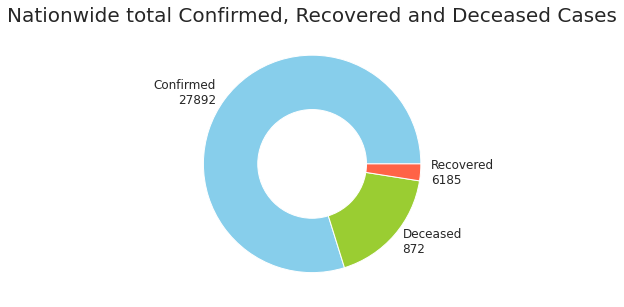

In [40]:
group_size = [sum(state_data['Confirmed']),
              sum(state_data['Recovered']),
              sum(state_data['Deceased'])]
group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                
                'Deceased\n' + str(sum(state_data['Deceased'])),
                'Recovered\n' + str(sum(state_data['Recovered']))]
custom_colors = ['skyblue','yellowgreen','tomato']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 20)
plt.show()

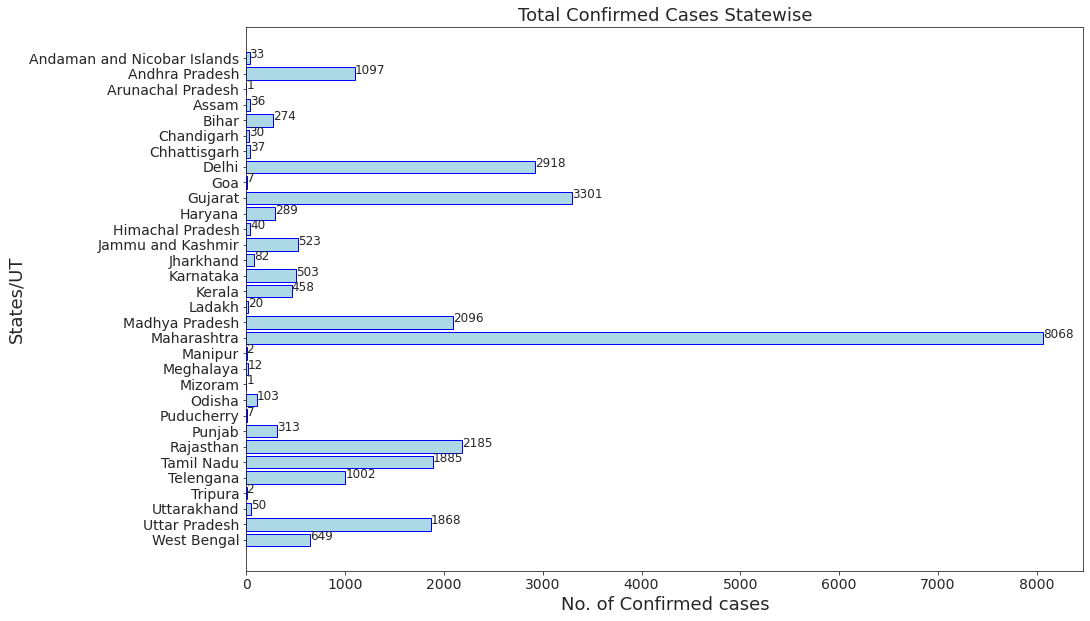

In [41]:
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"],    state_data["Confirmed"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()